## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [103]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# New Section

In [75]:
dataset=pd.read_csv('50_Startups.csv')

In [76]:
dataset.head()
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


**Scatter plot of Profit with Market Spend**

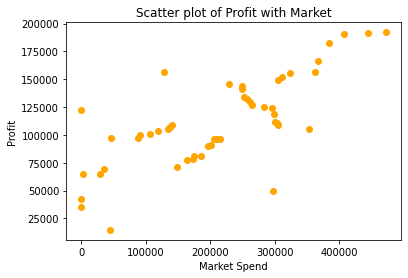

In [77]:
plt.scatter(dataset['Marketing Spend'],dataset['Profit'],color="orange")
plt.title("Scatter plot of Profit with Market")
plt.xlabel("Market Spend")
plt.ylabel("Profit")
plt.show()

**Scatter plot of Profit with R&D Spend**

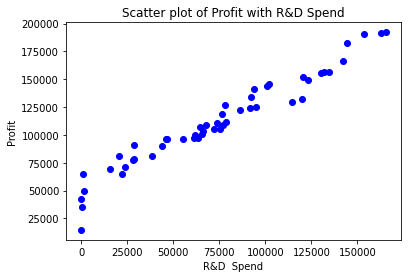

In [78]:
plt.scatter(dataset['R&D Spend'],dataset['Profit'],color="blue")
plt.title("Scatter plot of Profit with R&D Spend")
plt.xlabel("R&D  Spend")
plt.ylabel("Profit")
plt.show()

**Scatter plot of Profit with Administration Spend**

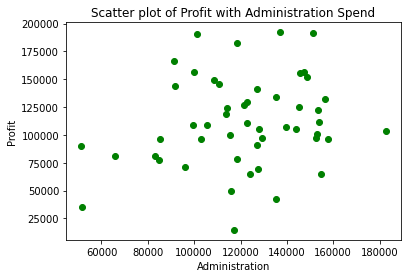

In [79]:
plt.scatter(dataset['Administration'],dataset['Profit'],color="green")
plt.title("Scatter plot of Profit with Administration Spend")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

Text(0, 0.5, 'Profit')

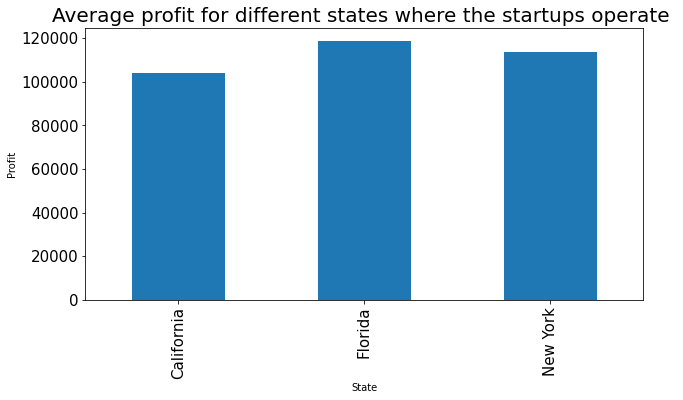

In [80]:
ax=dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize=(10,5),
    fontsize=15
)
ax.set_title("Average profit for different states where the startups operate ",fontsize=20)

ax.set_xlabel('State')
ax.set_ylabel('Profit')

In [81]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [82]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_state']=np.where(dataset['State']=='New York',1,0)
dataset['California_state']=np.where(dataset['State']=='California',1,0)
dataset['Florida_state']=np.where(dataset['State']=='Florida',1,0)
# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [84]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [85]:
dependent_variable = 'Profit'

In [86]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [87]:
independent_variables

['California_state',
 'NewYork_state',
 'Administration',
 'Florida_state',
 'R&D Spend',
 'Marketing Spend']

In [88]:
# Create the data of independent variables
X=dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [89]:
dataset[independent_variables]

,California_state,NewYork_state,Administration,Florida_state,R&D Spend,Marketing Spend
0,0,1,136897.80,0,165349.20,471784.10
1,1,0,151377.59,0,162597.70,443898.53
2,0,0,101145.55,1,153441.51,407934.54
3,0,1,118671.85,0,144372.41,383199.62
4,0,0,91391.77,1,142107.34,366168.42
5,0,1,99814.71,0,131876.90,362861.36
6,1,0,147198.87,0,134615.46,127716.82
7,0,0,145530.06,1,130298.13,323876.68
8,0,1,148718.95,0,120542.52,311613.29
9,1,0,108679.17,0,123334.88,304981.62


In [117]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [120]:
X_train[0:10]

array([[0.        , 0.        , 0.48655174, 1.        , 0.33561668,
        0.45494286],
       [0.        , 1.        , 0.3173015 , 0.        , 0.2782839 ,
        0.43561799],
       [0.        , 0.        , 0.87258866, 1.        , 0.45557444,
        0.28413435],
       [1.        , 0.        , 1.        , 0.        , 0.2807759 ,
        0.44680961],
       [0.        , 0.        , 0.59103645, 1.        , 0.55488118,
        0.62511553],
       [0.        , 0.        , 0.88568959, 1.        , 0.7880179 ,
        0.68649342],
       [0.        , 0.        , 0.98922572, 1.        , 0.72539353,
        0.54370828],
       [0.        , 1.        , 0.6847981 , 0.        , 0.0060492 ,
        0.0040356 ],
       [0.        , 1.        , 0.00432296, 0.        , 0.00327821,
        0.        ],
       [0.        , 1.        , 0.95618996, 0.        , 0.39676926,
        0.22709197]])

In [121]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
X_train[0:10]

array([[0.        , 0.        , 0.48655174, 1.        , 0.33561668,
        0.45494286],
       [0.        , 1.        , 0.3173015 , 0.        , 0.2782839 ,
        0.43561799],
       [0.        , 0.        , 0.87258866, 1.        , 0.45557444,
        0.28413435],
       [1.        , 0.        , 1.        , 0.        , 0.2807759 ,
        0.44680961],
       [0.        , 0.        , 0.59103645, 1.        , 0.55488118,
        0.62511553],
       [0.        , 0.        , 0.88568959, 1.        , 0.7880179 ,
        0.68649342],
       [0.        , 0.        , 0.98922572, 1.        , 0.72539353,
        0.54370828],
       [0.        , 1.        , 0.6847981 , 0.        , 0.0060492 ,
        0.0040356 ],
       [0.        , 1.        , 0.00432296, 0.        , 0.00327821,
        0.        ],
       [0.        , 1.        , 0.95618996, 0.        , 0.39676926,
        0.22709197]])

In [123]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [124]:
regressor.intercept_

44153.95466784858

In [125]:
regressor.coef_

array([ 8.66383692e+01,  7.86007422e+02,  3.49927567e+03, -8.72645791e+02,
        1.27892182e+05,  1.72720281e+04])

In [126]:
y_pred_train = regressor.predict(X_train)

In [127]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [128]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [129]:
#Predicted profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [130]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [131]:
mean_squared_error(y_test, y_pred)

83502864.03257714

In [132]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [133]:
# Test performance
r2_score(y_train, y_pred_train)

0.9501847627493607

In [136]:
# Accuracy percentage 
r2_score(y_test, y_pred)*100

93.47068473282427